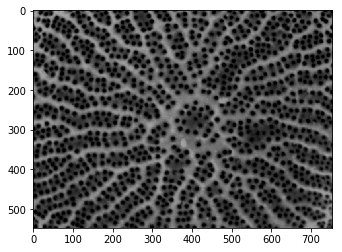

In [146]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2

img=mpimg.imread('cropped_Wild052.tif')
imgplot = plt.imshow(img)

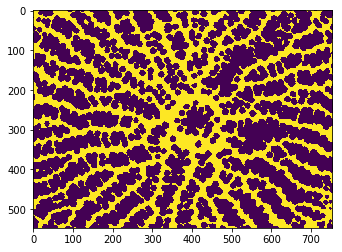

In [161]:
from skimage.morphology import binary_erosion
ero_img=binary_erosion(lum_img)
image=plt.subplot()
image.imshow(ero_img)

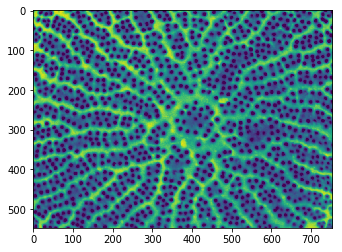

In [148]:
lum_img = img[:,:,0]
plt.imshow(lum_img)

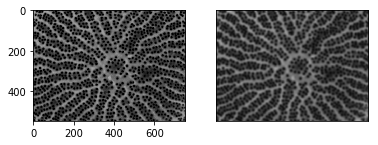

In [149]:
#trying to smooth an image
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cropped_Wild052.tif')
blur = cv2.blur(img,(12, 12))
plt.subplot(121),plt.imshow(img)
#plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur)
plt.xticks([]), plt.yticks([])
plt.show()
#for future, showing the plot is unnecessary; can leave that out and put it at the top

In [150]:
#trying to blur the erosion
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img2= cv2.imread('newimg')
#newimg=binary_erosion(lum_img)
ero_blur = cv2.blur(ero_img,(12, 12))
plt.subplot(121),plt.imshow(ero_img)
#plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ero_blur)
plt.xticks([]), plt.yticks([])
plt.show()
#for future, showing the plot is unnecessary; can leave that out and put it at the top

TypeError: src data type = 0 is not supported

In [151]:
#non blurred threshold
img2 = cv2.imread('cropped_Wild052.tif', 0)
ret,th= cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)

71.0


In [152]:
#blurred threshold
from skimage.filters import threshold_otsu
th=threshold_otsu(blur)
print(th)

74


/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (548, 754, 3) looks like an RGB image
  warn(msg.format(image.shape))


In [153]:
#eroded threshold
from skimage.filters import threshold_otsu
th_of_ero=threshold_otsu(ero_img)
print(th_of_ero)

0.001953125


In [154]:
#eroded threshold plotted
erosion = ero_img[:,:,0] > th_of_ero
imgplot = plt.imshow(erosion)

IndexError: too many indices for array

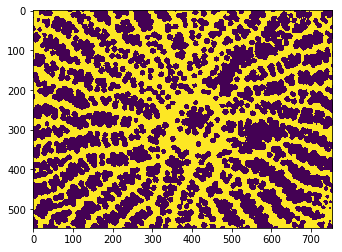

In [155]:
#non blurred threshold plotted
lum_img = img[:,:,0] > ret
imgplot = plt.imshow(lum_img)

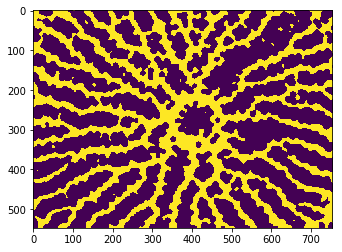

In [156]:
#blurred threshold plotted
blur_img = blur[:,:,0] > th
blurimgplot=plt.imshow(blur_img)

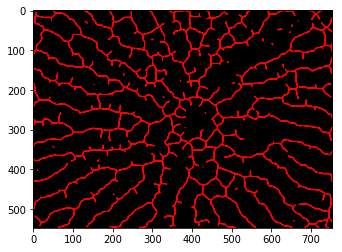

In [157]:
#using blurred
from skimage.morphology import skeletonize
skeleton = skeletonize(blur_img)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


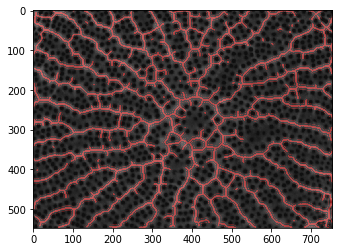

In [158]:
#blurred
img=mpimg.imread('cropped_Wild052.tif')
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(skeleton, cmap=red2, interpolation='sinc', alpha=.42) 
plt.show()

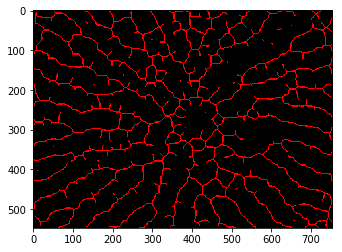

In [159]:
from skimage.morphology import dilation
newskel=dilation(skeleton)
myskel=plt.subplot()
myskel.imshow(newskel,cmap=red2)

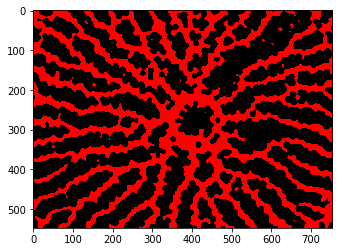

In [162]:
from skimage.morphology import opening
newskel=opening(blur_img)
myskel=plt.subplot()
myskel.imshow(newskel,cmap=red2)